In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import ensemble
from sklearn import tree
from sklearn import feature_selection
from sklearn import metrics
from sklearn import preprocessing
#from sklearn.impute import KNNImputer

In [2]:
def analysefeatures(pdf):
    inttypes=['int16','int32','int64']
    floattypes=['float32','float64']
    intcols=pdf.select_dtypes(include=inttypes).columns.values
    floatcols=pdf.select_dtypes(include=floattypes).columns.values
    catcols=pdf.select_dtypes(include=['object']).columns.values
    return intcols,floatcols,catcols

In [3]:
def modelwisetest(modellist,Xtrain,Xtest,Ytrain,Ytest):
    serieslist=[]
    for model in modellist:
        scores=np.zeros(Xtrain.shape[1])
        for i,col in enumerate(Xtrain.columns.values):
             #model=ensemble.RandomForestClassifier(100)
             
             model.fit(Xtrain[col].values.reshape(-1,1),Ytrain)
             predtest=model.predict(Xtest[col].values.reshape(-1,1))
             auc=metrics.roc_auc_score(Ytest,predtest)
             scores[i]=auc
        ser=pd.Series(scores)
        ser.index=Xtrain.columns
        serieslist.append(ser.sort_values(ascending=False))
    return serieslist


In [4]:
def reports(ytrue,predicted):
    print("Accuracy : {}".format(metrics.accuracy_score(ytrue,predicted)))
    print("Precision : {}".format(metrics.precision_score(ytrue,predicted)))
    print("Recall : {}".format(metrics.recall_score(ytrue,predicted)))
    print("F1_score : {}".format(metrics.f1_score(ytrue,predicted)))

In [5]:
def buildlog(Xtrain,Xtest,ytrain,ytest):
    model=linear_model.LogisticRegression()
    model.fit(Xtrain,ytrain)
    predtest=model.predict(Xtest)
    print("########TEST REPORT#########")
    reports(ytest,predtest)
    

In [6]:
def buildforest(Xtrain,Xtest,ytrain,ytest):
    model=ensemble.RandomForestClassifier(n_estimators=100, max_depth=25
                                          , min_samples_split=25 , min_samples_leaf=25)
    model.fit(Xtrain,ytrain)
    predtest=model.predict(Xtest)
    predtrain=model.predict(Xtrain)
    print("########TRAIN REPORT#########")
    reports(ytrain,predtrain)
    print("########TEST REPORT#########")
    reports(ytest,predtest)
    

In [7]:
def buildnb(Xtrain,Xtest,ytrain,ytest):
    model=naive_bayes.GaussianNB()
    model.fit(Xtrain,ytrain)
    predtest=model.predict(Xtest)
    print("########TEST REPORT#########")
    reports(ytest,predtest)

In [8]:
def buildtree(Xtrain,Xtest,ytrain,ytest):
    model=tree.DecisionTreeClassifier()
    model.fit(Xtrain,ytrain)
    predtest=model.predict(Xtest)
    predtrain=model.predict(Xtrain)
    print("########TRAIN REPORT#########")
    reports(ytrain,predtrain)
    print("########TEST REPORT#########")
    reports(ytest,predtest)

In [9]:
def buildknn(Xtrain,Xtest,ytrain,ytest):
    model=neighbors.KNeighborsClassifier()
    k=[l for l in range(5,17,2)]
    grid={"n_neighbors":k}
    grid_obj = model_selection.GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
    grid_fit =grid_obj.fit(Xtrain,ytrain)
    model = grid_fit.best_estimator_
    model.fit(Xtrain,ytrain)
    predtest=model.predict(Xtest)
    predtrain=model.predict(Xtrain)
    print("########TRAIN REPORT#########")
    reports(ytrain,predtrain)
    print("########TEST REPORT#########")
    reports(ytest,predtest)



In [10]:
df1=pd.read_csv('credit_train.csv')

In [11]:
df1.drop(['Loan ID','Customer ID'],inplace=True,axis=1)

In [12]:
df1.replace({'Loan Status':{'Yes':1,'No':0}},inplace=True)

In [13]:
df1.rename(columns={'Current Loan Amount':'loan_amount','Months since last delinquent':'deliquency'
                    ,'Number of Open Accounts':'open_accounts','Maximum Open Credit':'MOC'
                    ,'Current Credit Balance':'credit_bal','Years of Credit History':'credit_years'
                    ,'Home Ownership':'property','Years in current job':'job'
                    ,'Number of Credit Problems':'credit_problems'},inplace=True)

In [14]:
df1.fillna(df1.median(),inplace=True)

In [15]:
df1.isnull().sum()

Loan Status           0
loan_amount           0
Term                  0
Credit Score          0
Annual Income         0
job                4222
property              0
Purpose               0
Monthly Debt          0
credit_years          0
deliquency            0
open_accounts         0
credit_problems       0
credit_bal            0
MOC                   0
Bankruptcies          0
Tax Liens             0
dtype: int64

In [16]:
intcols,floatcols,catcols=analysefeatures(df1)

In [17]:
intcols

array(['Loan Status'], dtype=object)

In [18]:
catcols

array(['Term', 'job', 'property', 'Purpose'], dtype=object)

In [19]:
floatcols

array(['loan_amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'credit_years', 'deliquency', 'open_accounts', 'credit_problems',
       'credit_bal', 'MOC', 'Bankruptcies', 'Tax Liens'], dtype=object)

In [20]:
df1.isnull().sum()

Loan Status           0
loan_amount           0
Term                  0
Credit Score          0
Annual Income         0
job                4222
property              0
Purpose               0
Monthly Debt          0
credit_years          0
deliquency            0
open_accounts         0
credit_problems       0
credit_bal            0
MOC                   0
Bankruptcies          0
Tax Liens             0
dtype: int64

In [21]:
######### cat_df #############
catcols
cat_df=pd.DataFrame(df1[catcols])
cat_df=pd.concat([cat_df,df1['Loan Status']],axis=1)

In [22]:
######### float_df ################
floatcols
float_df=pd.DataFrame(df1[floatcols])
float_df=pd.concat([float_df,df1['Loan Status']],axis=1)


In [23]:
# ANALYSIS OF FLOAT_DF
##################### NAN HANDLING ###########################################
float_df.fillna(float_df.median(),inplace=True)
X_f=float_df.drop('Loan Status',axis=1)
Y_f=float_df['Loan Status']
Xtrain_f,Xtest_f,Ytrain_f,Ytest_f=model_selection.train_test_split(X_f,Y_f,test_size=.2,random_state=0)
X_f['Bankruptcies'].isnull().sum()
# APPLYING LOG REGN AFTER REPLACING NAN WITH 0
buildlog(Xtrain_f,Xtest_f,Ytrain_f,Ytest_f)


E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


########TEST REPORT#########
Accuracy : 0.81825
Precision : 0.8113148245154531
Recall : 0.9978738483345145
F1_score : 0.8949755857964232


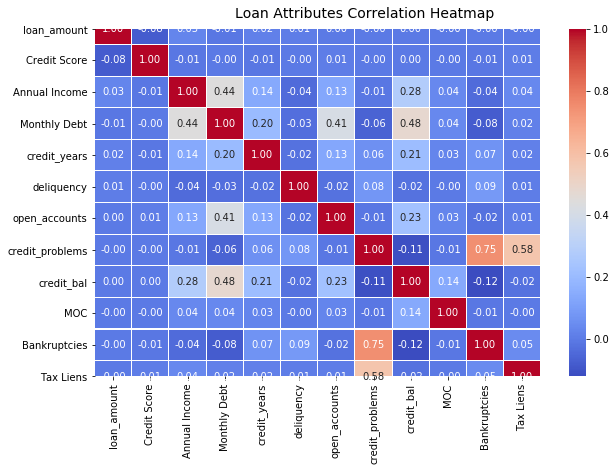

In [24]:
# HEAT MAP OF CORRELATION SCORES :
# HEATMAPS OF ALL FLOAT FEATURES :
f, ax = plt.subplots(figsize=(10, 6))
corr = X_f.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Loan Attributes Correlation Heatmap', fontsize=14)

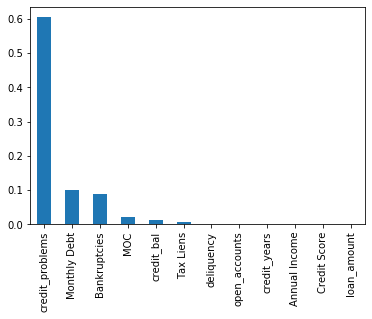

In [25]:
#########TRAIN REPORT#########
#Accuracy : 0.81415
#Precision : 0.809433465085639
#Recall : 0.9934670116429496
#F1_score : 0.8920574996369972
#AUC : 0.5984956203589198
#########TEST REPORT#########
#Accuracy : 0.81875
#Precision : 0.813349488989569
#Recall : 0.9947168352554604
#F1_score : 0.8949366721734342
#AUC : 0.6018460264689893

# APPLYING LOG REGN AFTER REPLACING NAN WITH MEAN
#########TRAIN REPORT#########
#Accuracy : 0.81395
#Precision : 0.8093525179856115
#Recall : 0.9932891332470892
#F1_score : 0.8919366314780665
#AUC : 0.5982690159627517
#########TEST REPORT#########
#Accuracy : 0.8188
#Precision : 0.8135575351852828
#Recall : 0.9943946910637201
#F1_score : 0.8949321581816073
#AUC : 0.6023547467374863

# APPLYING LOG REGN AFTER REPLACING NAN WITH MEDIAN
#########TRAIN REPORT#########
#Accuracy : 0.81415
#Precision : 0.8093275030951189
#Recall : 0.9936772315653298
#F1_score : 0.8920778711728583
#AUC : 0.5982428008046914
#########TEST REPORT#########
#Accuracy : 0.81905
#Precision : 0.813573611550216
#Recall : 0.9947812640938084
#F1_score : 0.8950984086495261
#AUC : 0.6024364011918026

################## APPLYING ANOVA ON FLOAT_DF AFTER REPLACING NAN WITH ZERO ####################
fvalue,probability=feature_selection.f_classif(Xtrain_f,Ytrain_f)
ser=pd.Series(probability)
ser.index=Xtrain_f.columns
ser.sort_values(ascending=False).plot.bar()
ser.sort_values(ascending=False,inplace=True)


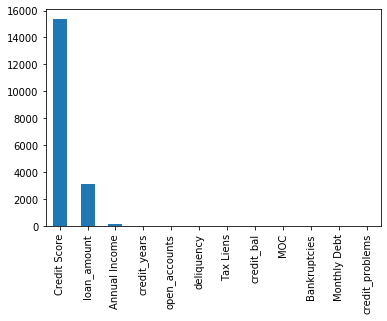

In [26]:
ser1=pd.Series(fvalue)
ser1.index=Xtrain_f.columns
ser1.sort_values(ascending=False).plot.bar()
ser1.sort_values(ascending=False,inplace=True)

In [27]:
# SELECTING K=3 BEST COLUMNS ACCORDING TO ANOVA 
obj=feature_selection.SelectKBest(score_func=feature_selection.f_classif,k=3) 
obj.fit(Xtrain_f,Ytrain_f)
Xtrain_f.columns.values[obj.get_support()]
#array(['loan_amount', 'Credit Score', 'Annual Income'], dtype=object)
lst_anova=['loan_amount', 'Credit Score', 'Annual Income']
arr_anova=np.array(lst_anova)
###########################################################################################

In [28]:
#ANALYSIS OF CAT_DF :
cat_df.fillna(cat_df.median(), inplace=True)
cat_df['job'].unique()
cat_df['job'].value_counts()

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: job, dtype: int64

In [29]:
cat_df.property.unique()
cat_df.property.value_counts()
#Home Mortgage    48410
#Rent             42194
#Own Home          9182
#HaveMortgage       214

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: property, dtype: int64

In [30]:
cat_df.Purpose.unique()
cat_df.Purpose.value_counts()
#Debt Consolidation      78552
#other                    6037
#Home Improvements        5839
#Other                    3250
#Business Loan            1569
#Buy a Car                1265
#Medical Bills            1127
#Buy House                 678
#Take a Trip               573
#major_purchase            352
#small_business            283
#moving                    150
#wedding                   115
#vacation                  101
#Educational Expenses       99
#renewable_energy           10


Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [31]:
# LABEL ENCODING OF PROPERTY 
cat_df.replace({'Purpose':{'Home Improvements':0, 'Debt Consolidation':1, 'Buy House':0, 'other':0,
       'Business Loan':0, 'Buy a Car':0, 'major_purchase':0, 'Take a Trip':0,
       'Other':0, 'small_business':0, 'Medical Bills':0, 'wedding':0, 'vacation':0,
       'Educational Expenses':0, 'moving':0, 'renewable_energy':0}},inplace=True)

In [32]:
cat_df.replace({'property':{'Home Mortgage':1, 'Own Home':0, 'Rent':0, 'HaveMortgage':1}},inplace=True)

In [33]:
# MEAN ENCODING :
cat_cols=cat_df.drop(['Loan Status','Purpose','property'],axis=1).columns.values
for col in cat_cols:
    mean_dict=cat_df.groupby(col)['Loan Status'].mean().to_dict()
    cat_df[col]=cat_df[col].map(mean_dict)

In [34]:
cat_train,cat_test=model_selection.train_test_split(cat_df, test_size=.20, random_state=0)
X_cat_train=cat_train.drop(['Loan Status','job'],axis=1)
Y_cat_train=cat_train['Loan Status']
X_cat_test=cat_test.drop(['Loan Status','job'],axis=1)
Y_cat_test=cat_test['Loan Status']
buildlog(X_cat_train,X_cat_test,Y_cat_train,Y_cat_test)

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


########TEST REPORT#########
Accuracy : 0.77605
Precision : 0.77605
Recall : 1.0
F1_score : 0.8739055769826299


In [35]:
objchi = feature_selection.SelectKBest(score_func=feature_selection.chi2, k='all')
objchi.fit(X_cat_train, Y_cat_train)

SelectKBest(k='all', score_func=<function chi2 at 0x000001D13A387168>)

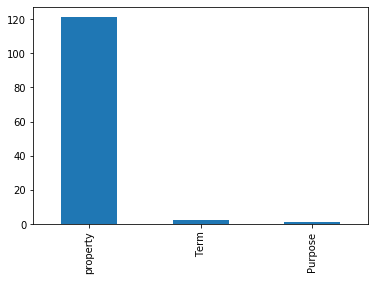

In [36]:
# bar plot for chi2
ser_chi=objchi.scores_
ser_chi=pd.Series(ser_chi)
ser_chi.index=X_cat_train.columns
ser_chi.sort_values(ascending=False).plot.bar()

In [37]:
X_cat_train.columns.values[objchi.get_support()]
#array(['Term', 'property', 'Purpose'], dtype=object)

array(['Term', 'property', 'Purpose'], dtype=object)

In [38]:
cat_df.drop('Loan Status',axis=1,inplace=True)
X_all=pd.concat([cat_df['Term'], float_df[arr_anova]],axis=1)
Y_all=df1['Loan Status']
Xtrain_all,Xtest_all,Ytrain_all,Ytest_all=model_selection.train_test_split(X_all,Y_all,test_size=.2
                                                                           ,random_state=0)

In [39]:
#build(Xtrain_all,Xtest_all,Ytrain_all,Ytest_all)

In [40]:
 buildlog(Xtrain_all,Xtest_all,Ytrain_all,Ytest_all)

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


########TEST REPORT#########
Accuracy : 0.8186
Precision : 0.811972089607051
Recall : 0.997165131112686
F1_score : 0.8950899311780695


In [41]:
buildforest(Xtrain_all,Xtest_all,Ytrain_all,Ytest_all)

########TRAIN REPORT#########
Accuracy : 0.819975
Precision : 0.8114282713164045
Recall : 0.999353169469599
F1_score : 0.8956391936348749
########TEST REPORT#########
Accuracy : 0.8213
Precision : 0.8136848185685028
Recall : 0.9983248502029508
F1_score : 0.8965976160166648


In [42]:
buildnb(Xtrain_all,Xtest_all,Ytrain_all,Ytest_all)

########TEST REPORT#########
Accuracy : 0.3497
Precision : 0.9518505210204815
Recall : 0.1706719927839701
F1_score : 0.28944493006993005


In [43]:
buildtree(Xtrain_all,Xtest_all,Ytrain_all,Ytest_all)

########TRAIN REPORT#########
Accuracy : 0.9828875
Precision : 0.9936005224063342
Recall : 0.9842011642949547
F1_score : 0.9888785084690687
########TEST REPORT#########
Accuracy : 0.7495
Precision : 0.8378222022240792
Recall : 0.8397654790284131
F1_score : 0.838792715103932


In [44]:
buildknn(Xtrain_all,Xtest_all,Ytrain_all,Ytest_all)

E:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


########TRAIN REPORT#########
Accuracy : 0.7827375
Precision : 0.7862597385873414
Recall : 0.9873382923673998
F1_score : 0.8754005519911108
########TEST REPORT#########
Accuracy : 0.7731
Precision : 0.7824409813300417
Recall : 0.9801559177888023
F1_score : 0.8702093581970026


In [45]:
############ KFOLD CROSS VALIDATION ###########
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
X_all=pd.concat([cat_df[['Term','property','Purpose']], float_df[arr_anova]],axis=1)
Y_all=df1['Loan Status']

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklea

LR: 0.814650
KNN: 0.756150
DECISION TREE: 0.756620
NB: 0.352640


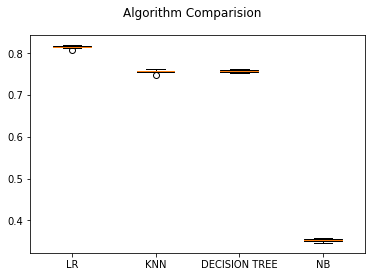

In [47]:
seed = 7
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DECISION TREE',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
results=[]
names=[]

scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results=model_selection.cross_val_score(model, X_all, Y_all, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s: %f" %(name,cv_results.mean())
    print(msg)
fig=plt.figure()
fig.suptitle('Algorithm Comparision')
ax=fig.add_subplot(111);
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [48]:
############### VOTING ###################
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

In [49]:
X_all=pd.concat([cat_df['Term'], float_df[arr_anova]],axis=1)
Y_all=df1['Loan Status']


In [50]:
seed=7
kfold=model_selection.KFold(n_splits=10,random_state=7)
#create the submodel
estimators=[]
model1=LogisticRegression()
estimators.append(('Logistic',model1))
model2=DecisionTreeClassifier()
estimators.append(('Decision',model2))
model3=KNeighborsClassifier()
estimators.append(('KNN',model3))
model4=GaussianNB()
estimators.append(('Gaussian',model4))

ensemble=VotingClassifier(estimators)
results=model_selection.cross_val_score(ensemble,X_all,Y_all,cv=kfold)
print("Weighted Mean of all models : LR ,Decision Tree, KNN, Gaussian")
print(results.mean())

E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\anaconda\lib\site-packages\sklea

Weighted Mean of all models : LR ,Decision Tree, KNN, Gaussian
0.73548


In [51]:
############ ADABOOST CLASSIFIER ##################
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

In [52]:
X_all=pd.concat([cat_df[['Term','property','Purpose']], float_df[arr_anova]],axis=1)
Y_all=df1['Loan Status']

In [53]:
seed=7
num_trees=30
kfold=model_selection.KFold(n_splits=10,random_state=seed)
model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results=model_selection.cross_val_score(model,X_all,Y_all,cv=kfold)
print(results.mean())

0.8190899999999999


In [54]:
############### BAGGING CLASSIFIER ###################
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [55]:
X_all=pd.concat([cat_df[['Term','property','Purpose']], float_df[arr_anova]],axis=1)
Y_all=df1['Loan Status']

In [56]:
kfold=model_selection.KFold(n_splits=10,random_state=7)

In [57]:
cart=DecisionTreeClassifier()
num_trees=100
model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=10)
results=model_selection.cross_val_score(model,X_all,Y_all,cv=kfold)


In [58]:
print(results.mean())

0.79386
